#Group 2 - Dataminds - Final Project

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Import data
df = pd.read_csv("Training Data.csv")

## 1. Stage 1

### 1.1 EDA


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# Define data class
cats = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

#### 1.1.1 Univariate Analisis

General Overview

In [ ]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


##### 1.1.1.1 Numerical Feature

Descriptive statistics for Income:
count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64


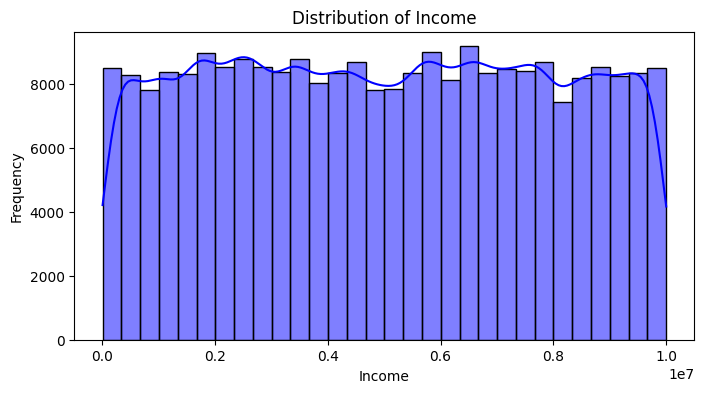

In [ ]:
# Analysis of Income
print('Descriptive statistics for Income:')
print(df['Income'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for Age:
count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64


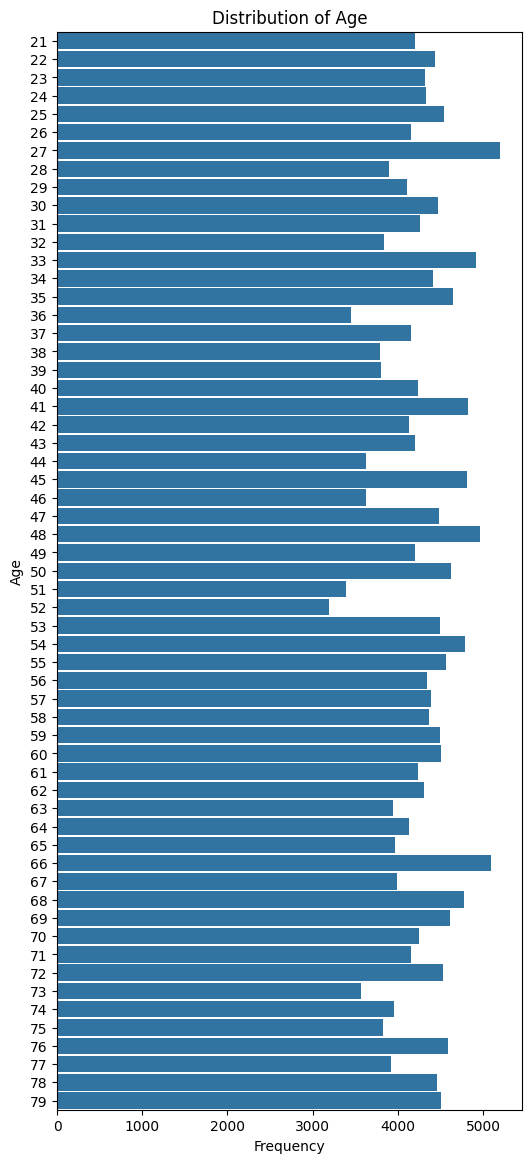

In [ ]:
# Analysis of Age
print('Descriptive statistics for Age:')
print(df['Age'].describe())

# Plot histogram
plt.figure(figsize=(6, 14))
sns.countplot(data=df, y='Age', width = 0.9)
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.xlabel('Frequency')
plt.show()

Descriptive statistics for Experience:
count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64


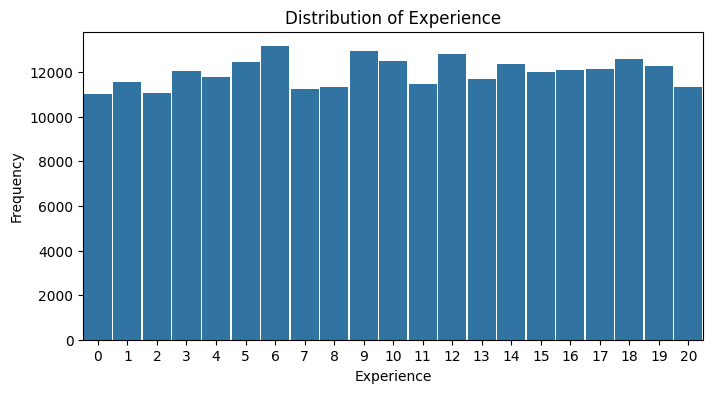

In [ ]:
# Analysis of Experience
print('Descriptive statistics for Experience:')
print(df['Experience'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Experience', width = 0.95)
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_JOB_YRS:
count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64


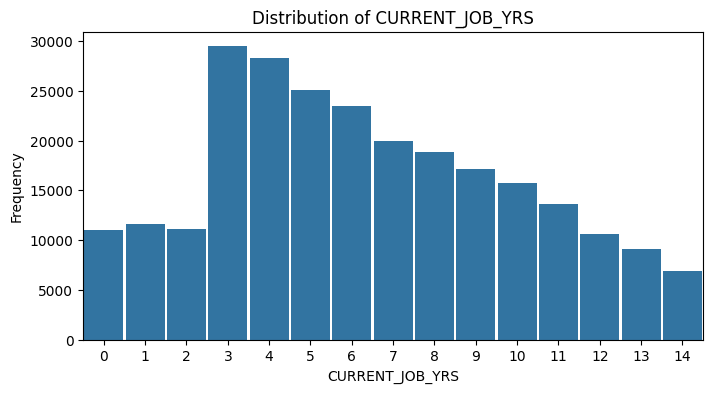

In [ ]:
# Analysis of CURRENT_JOB_YRS
print('Descriptive statistics for CURRENT_JOB_YRS:')
print(df['CURRENT_JOB_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='CURRENT_JOB_YRS', width = 0.95)
plt.title('Distribution of CURRENT_JOB_YRS')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_HOUSE_YRS:
count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64


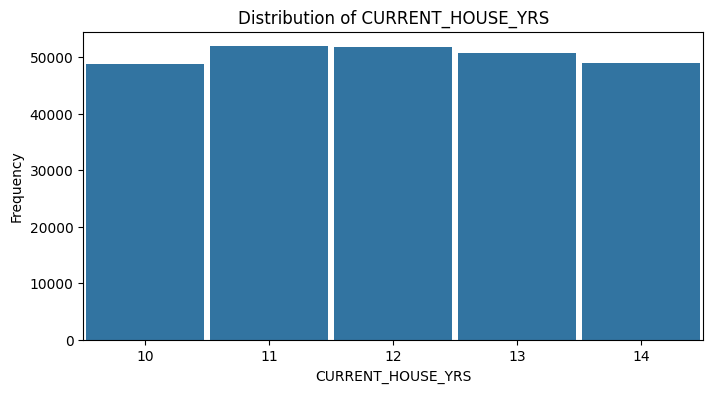

In [ ]:
# Analysis of CURRENT_HOUSE_YRS
print('Descriptive statistics for CURRENT_HOUSE_YRS:')
print(df['CURRENT_HOUSE_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='CURRENT_HOUSE_YRS', width=0.95)
plt.title('Distribution of CURRENT_HOUSE_YRS')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.show()

##### 1.1.1.2 Categorical Feature

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64
Descriptive statistics for Risk_Flag:
count    252000.000000
mean          0.123000
std           0.328438
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk_Flag, dtype: float64


Text(0, 0.5, '')

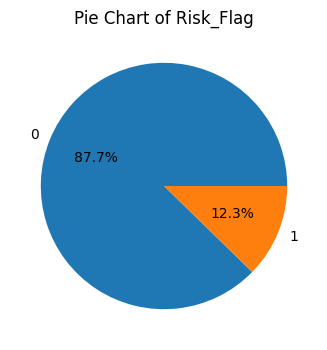

In [ ]:
df = df[df['Risk_Flag'].notna()]
# Ensure Risk_Flag is binary type
df['Risk_Flag'] = df['Risk_Flag'].astype(int)

# Descriptive statistics for Risk_Flag
print(df['Risk_Flag'].value_counts())
print('Descriptive statistics for Risk_Flag:')
print(df['Risk_Flag'].describe())

# Plot Pie chart
plt.figure(figsize=(8, 4))
df['Risk_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Risk_Flag')
plt.ylabel('')


Frequency distribution for Married/Single:
Married/Single
single     226272
married     25728
Name: count, dtype: int64


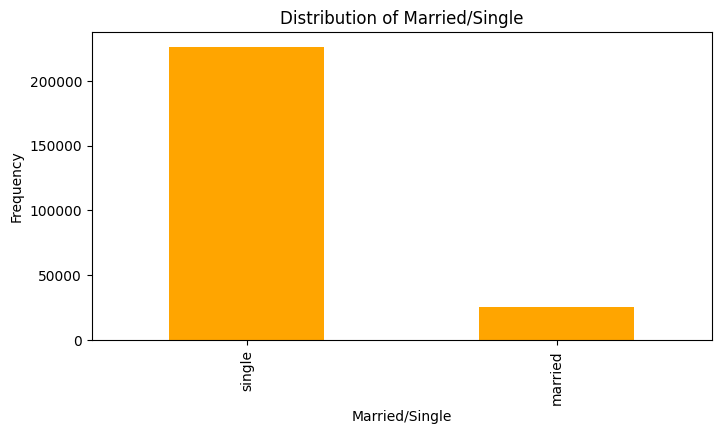

In [ ]:
# Analysis of Married/Single
print('Frequency distribution for Married/Single:')
print(df['Married/Single'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Married/Single'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Married/Single')
plt.xlabel('Married/Single')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for House_Ownership:
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


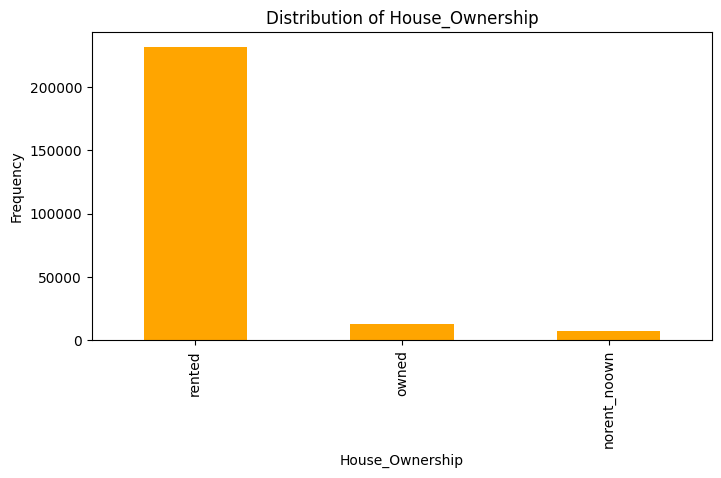

In [ ]:
# Analysis of House_Ownership
print('Frequency distribution for House_Ownership:')
print(df['House_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['House_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of House_Ownership')
plt.xlabel('House_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Car_Ownership:
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


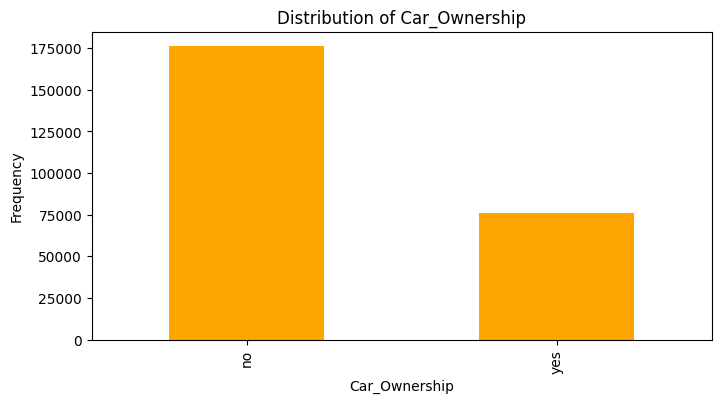

In [ ]:
# Analysis of Car_Ownership
print('Frequency distribution for Car_Ownership:')
print(df['Car_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Car_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Car_Ownership')
plt.xlabel('Car_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Profession:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artis

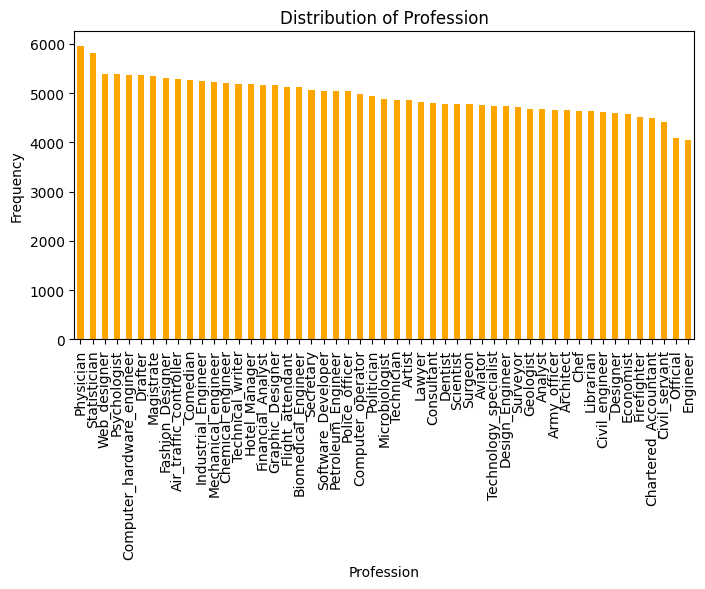

In [ ]:
# Analysis of Profession
print('Frequency distribution for Profession:')
print(df['Profession'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Profession'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.show()

Top 10 Professions

Frequency distribution for Top 10 Professions:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Name: count, dtype: int64


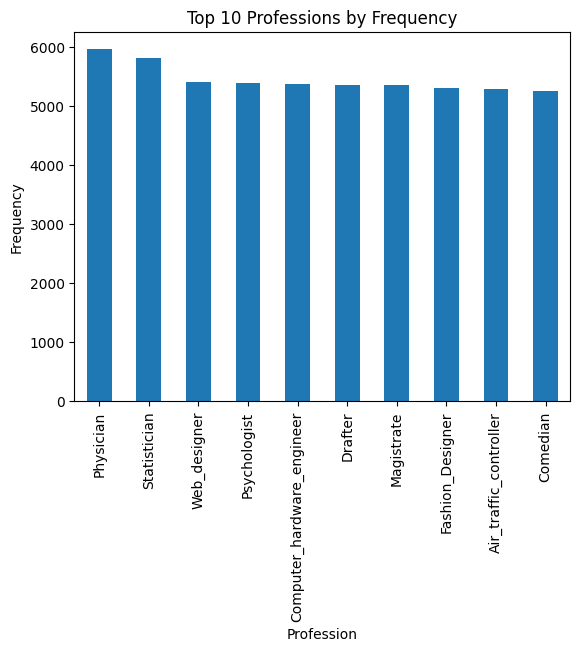

In [ ]:
# Analysis of Top 10 Professions
print('Frequency distribution for Top 10 Professions:')
top_10_professions = df['Profession'].value_counts().head(10)
print(top_10_professions)

# Plot bar
plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions by Frequency')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Frequency distribution for CITY:
CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64


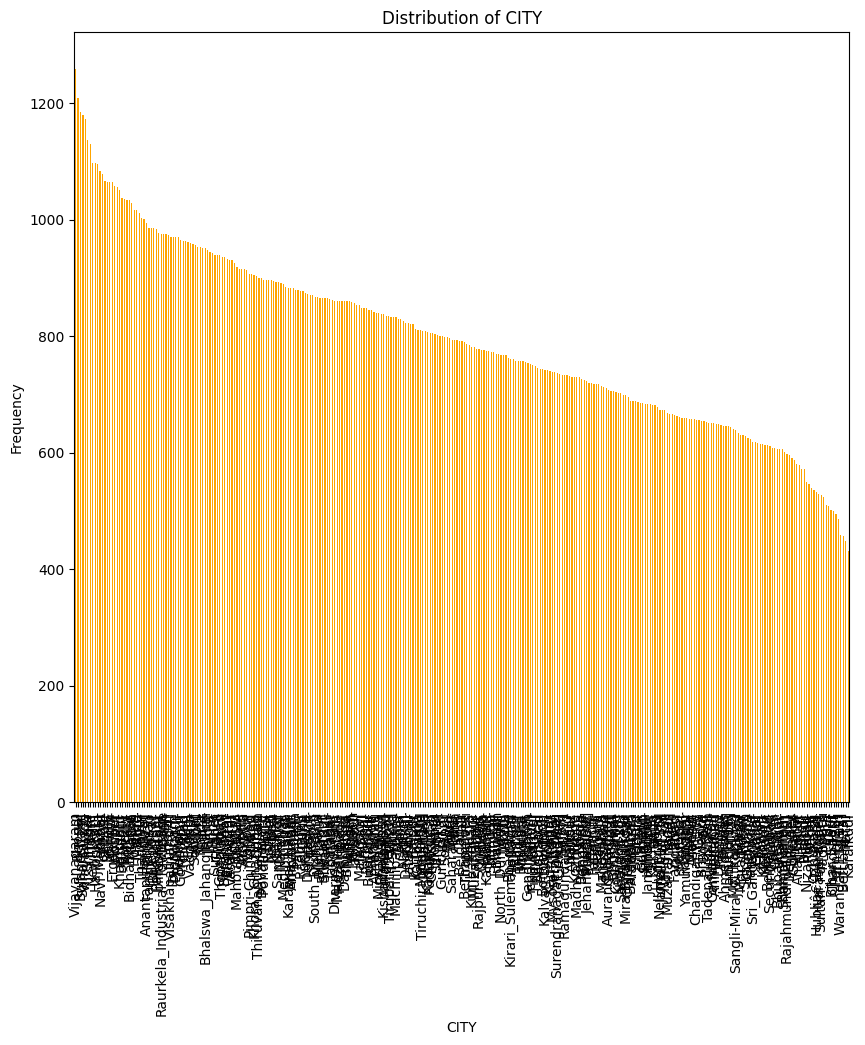

In [ ]:
# Analysis of CITY
print('Frequency distribution for CITY:')
print(df['CITY'].value_counts())

# Plot bar chart
plt.figure(figsize=(10, 10))
df['CITY'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of CITY')
plt.xlabel('CITY')
plt.ylabel('Frequency')
plt.show()

Top 10 City

Frequency distribution for Top 10 Cities:
CITY
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa[29]      1180
Vijayawada       1172
Srinagar         1136
Indore           1130
New_Delhi        1098
Hajipur[31]      1098
Satara           1096
Name: count, dtype: int64


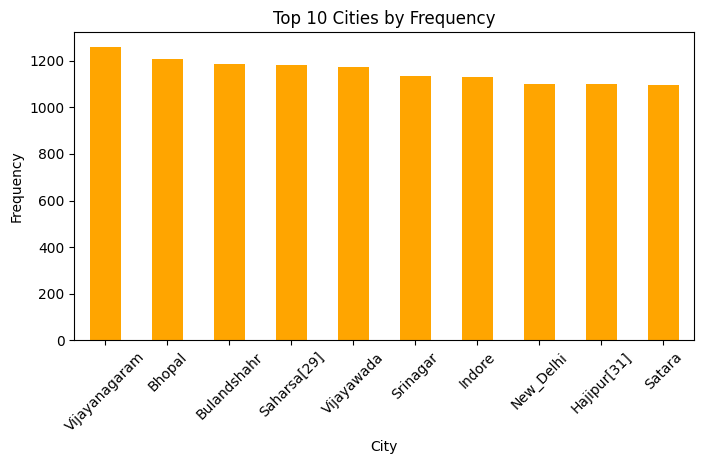

In [ ]:
# Analysis of Top 10 Cities
print('Frequency distribution for Top 10 Cities:')
top_10_cities = df['CITY'].value_counts().head(10)
print(top_10_cities)

# Plot bar
plt.figure(figsize=(8, 4))
top_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency distribution for STATE:
STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


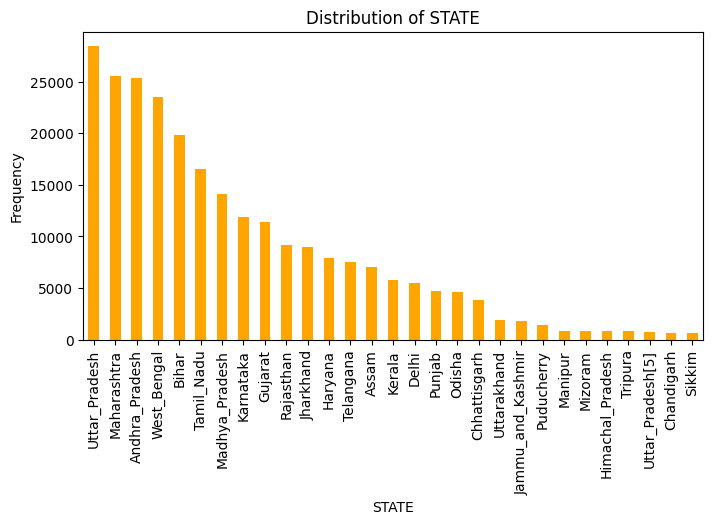

In [ ]:
# Analysis of STATE
print('Frequency distribution for STATE:')
print(df['STATE'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['STATE'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of STATE')
plt.xlabel('STATE')
plt.ylabel('Frequency')
plt.show()

#### 1.1.2 Multivariate analisis

##### 1.1.2.1 Numerical vs Risk_Flag

<Axes: >

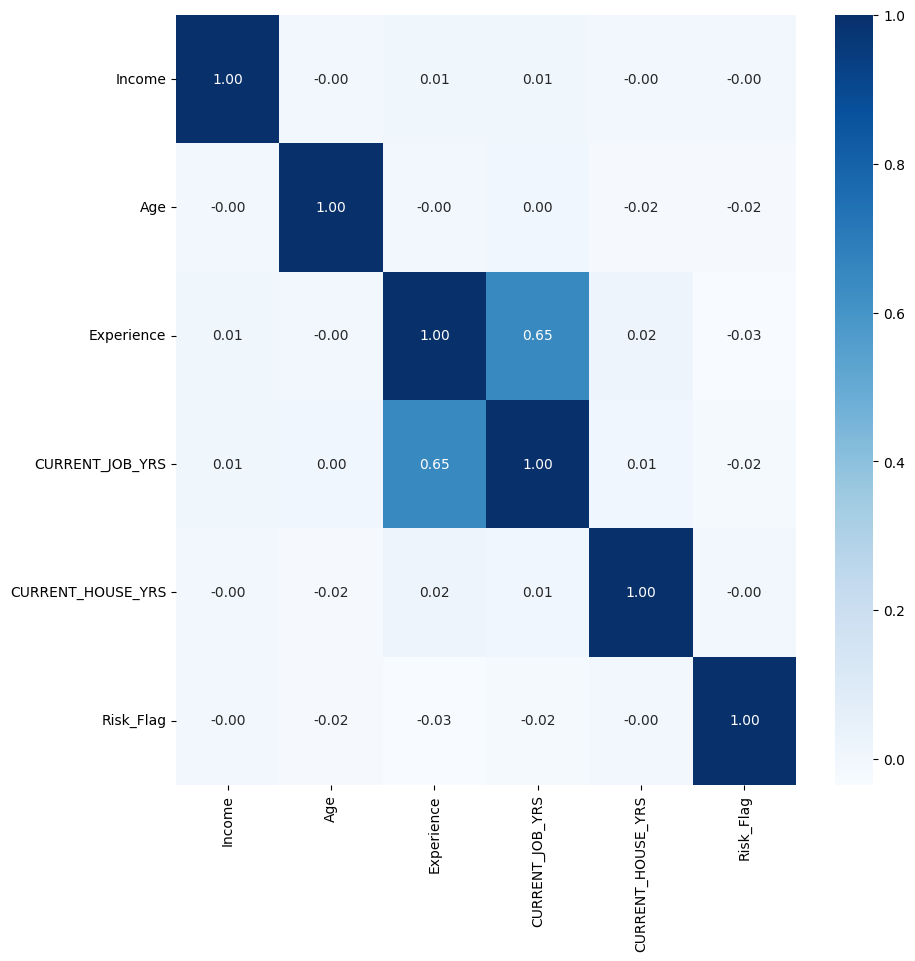

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

##### 1.1.2.2 Categorical vs Risk_Flag

In [ ]:
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

age_group  Risk_Flag
20-30      0            37339
           1             6318
30-40      0            36620
           1             4872
40-50      0            38267
           1             5232
50-60      0            37410
           1             5130
60-70      0            38319
           1             4997
70-80      0            33049
           1             4447
Name: count, dtype: int64

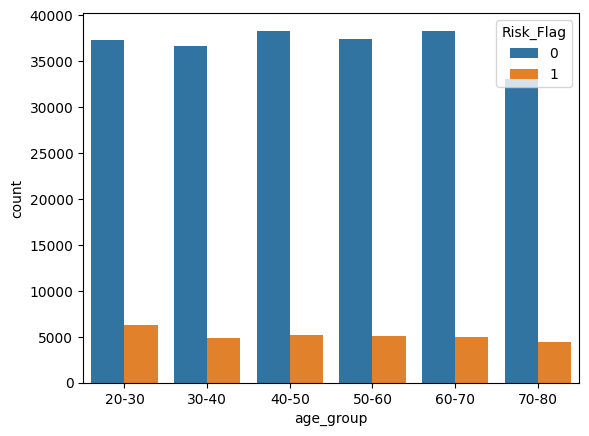

In [ ]:
sns.countplot(data=df, x='age_group', hue='Risk_Flag')
df.groupby("age_group")["Risk_Flag"].value_counts()

In [ ]:
df['income_group'] = pd.cut(df['Income'],
                            bins=[0, 1250000, 2500000, 3750000, 5000000, 6250000, 7500000, 8750000, 10000000],
                            labels=['0-1250k', '1250k-2500k', '2500k-3750k', '3750k-5000k', '5000k-6250k', '6250k-7500k', '7500k-8750k', '8750k-10000k'])

income_group  Risk_Flag
0-1250k       0            26776
              1             4175
1250k-2500k   0            28127
              1             3882
2500k-3750k   0            28400
              1             3796
3750k-5000k   0            27108
              1             3694
5000k-6250k   0            27716
              1             3851
6250k-7500k   0            28209
              1             3685
7500k-8750k   0            26979
              1             4005
8750k-10000k  0            27689
              1             3908
Name: count, dtype: int64

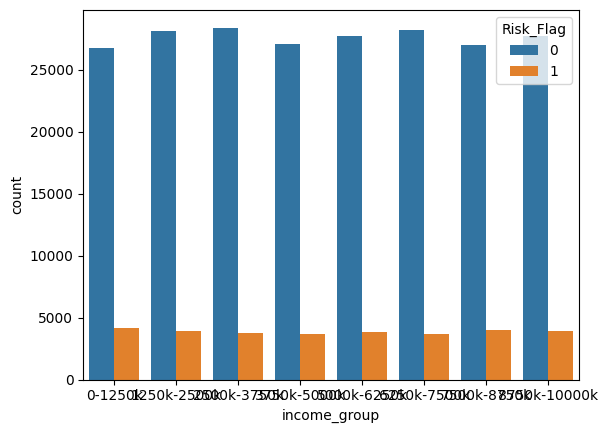

In [ ]:
sns.countplot(data=df, x='income_group', hue='Risk_Flag')
df.groupby("income_group")["Risk_Flag"].value_counts()

Married/Single  Risk_Flag
married         0             23092
                1              2636
single          0            197912
                1             28360
Name: count, dtype: int64

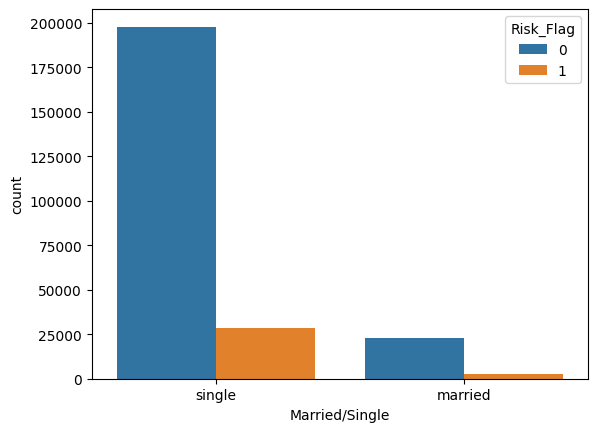

In [ ]:
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')
df.groupby("Married/Single")["Risk_Flag"].value_counts()

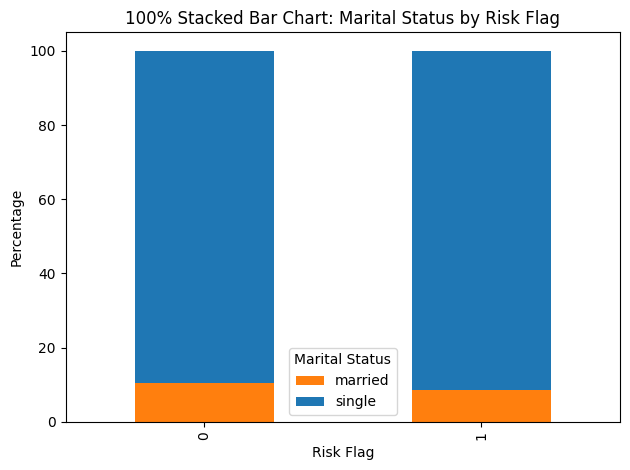

In [ ]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Married/Single', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Marital Status by Risk Flag')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

House_Ownership  Risk_Flag
norent_noown     0              6469
                 1               715
owned            0             11758
                 1              1160
rented           0            202777
                 1             29121
Name: count, dtype: int64

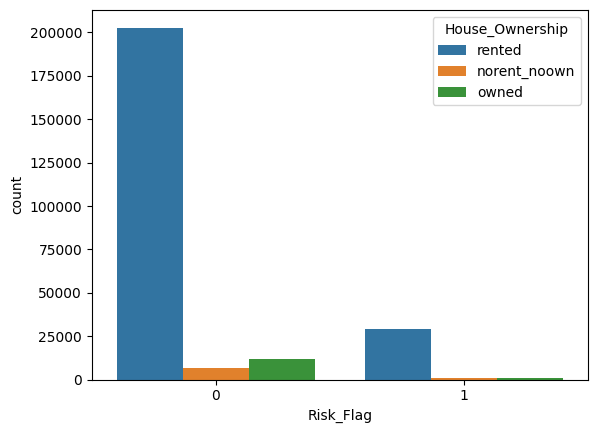

In [ ]:
sns.countplot(data=df, x='Risk_Flag', hue='House_Ownership')
df.groupby('House_Ownership')["Risk_Flag"].value_counts()

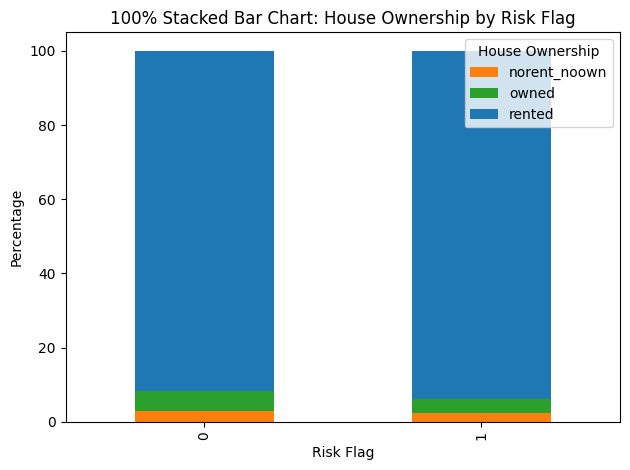

In [ ]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='House_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c','#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: House Ownership by Risk Flag')
plt.legend(title='House Ownership')
plt.tight_layout()
plt.show()

Car_Ownership  Risk_Flag
no             0            153439
               1             22561
yes            0             67565
               1              8435
Name: count, dtype: int64

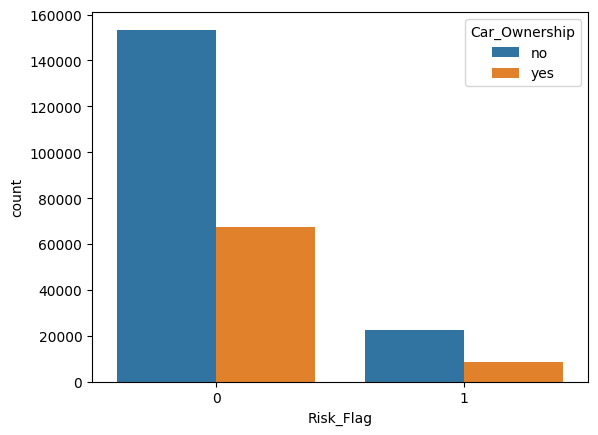

In [ ]:
sns.countplot(data=df, x='Risk_Flag', hue='Car_Ownership')
df.groupby('Car_Ownership')["Risk_Flag"].value_counts()

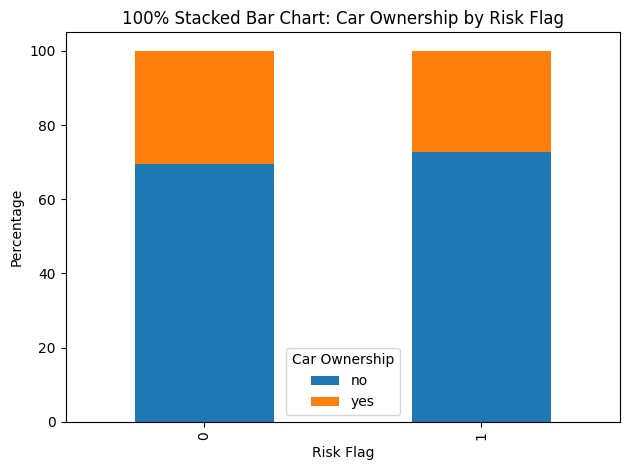

In [ ]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Car_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#1f77b4','#ff7f0e'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Car Ownership by Risk Flag')
plt.legend(title='Car Ownership')
plt.tight_layout()
plt.show()

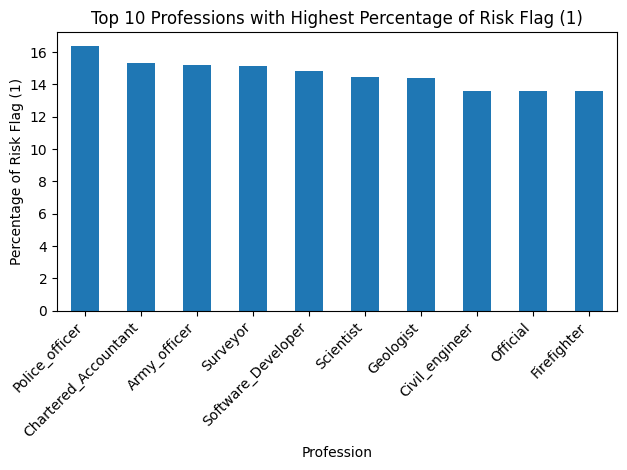

In [ ]:
profession_risk = df.groupby('Profession')['Risk_Flag'].mean() * 100

# Get the top 10 professions by highest risk_flag percentage
top_10_professions = profession_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions with Highest Percentage of Risk Flag (1)')
plt.xlabel('Profession')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('CITY')['Risk_Flag'].mean() * 100

,Risk_Flag
CITY,
Adoni,10.807975
Agartala,16.810878
Agra,8.003953
Ahmedabad,20.493066
Ahmednagar,5.891473
...,...
Vijayanagaram,11.834790
Vijayawada,12.542662
Visakhapatnam[4],14.521112


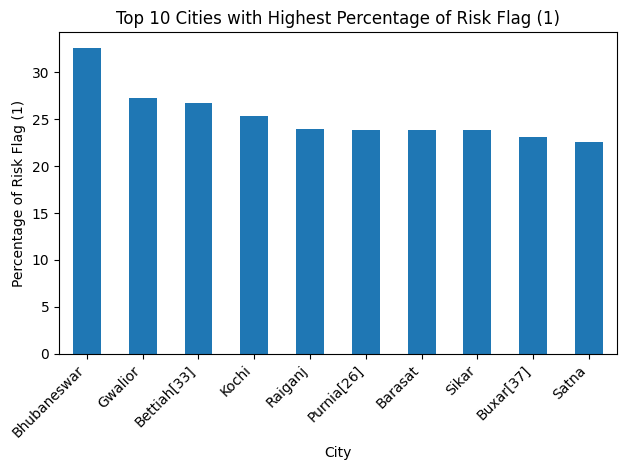

In [ ]:
city_risk = df.groupby('CITY')['Risk_Flag'].mean() * 100

# Get the top 10 cities by highest risk_flag percentage
top_10_city = city_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_city.plot(kind='bar')
plt.title('Top 10 Cities with Highest Percentage of Risk Flag (1)')
plt.xlabel('City')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

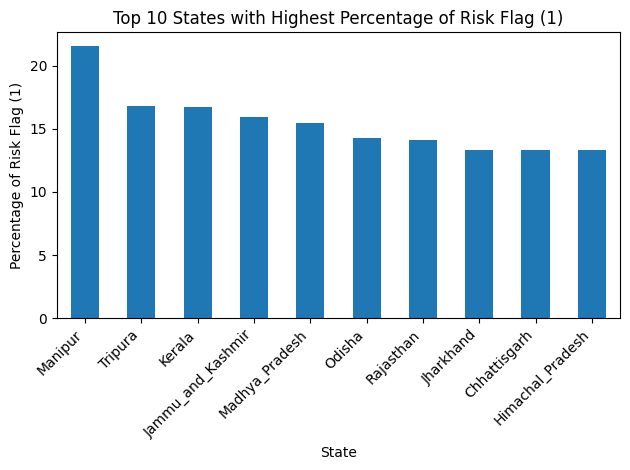

In [ ]:
state_risk = df.groupby('STATE')['Risk_Flag'].mean() * 100

# Get the top 10 states by highest risk_flag percentage
top_10_state = state_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_state.plot(kind='bar')
plt.title('Top 10 States with Highest Percentage of Risk Flag (1)')
plt.xlabel('State')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.2 Preprocessing

#### 1.2.1 Check for missing values

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


#### 1.2.2 Checking for duplicates

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

In [ ]:
# Print all unique values of STATE
a = df['STATE'].unique()

print(a)

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


In [ ]:
# Change the value Uttar_Pradesh[5] to Uttar_Pradesh
df['STATE'] = df['STATE'].str.replace(r'Uttar_Pradesh\[\d+\]','Uttar_Pradesh', regex=True)

print(df['STATE'].unique())

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']


In the 'STATE' column there is data that has a category value that is less appropriate, namely Uttar_Pradesh[5] and Uttar_Pradesh. Actually, it describes the same thing, but is written in a different format. To ensure data consistency, the value of Uttar_Pradesh[5] is changed to Uttar_Pradesh.

In [ ]:
a = df['Profession'].unique()
print(a)

['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


In [ ]:
# memunculkan kolom CITY
a =  df['CITY'].unique()

print(a)

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

In [ ]:
# Function to remove trailing numbers in square brackets
def clean_city_name(city):
    return re.sub(r'\[\d+\]', '', city)

# Apply cleaning to all cities
df['CITY'] = np.array([clean_city_name(city) for city in df['CITY']])

# memunculkan kolom CITY
a = df['CITY'].unique()

print(a)

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar' 'Hajipur' 'Adoni' 'Erode'
 'Kollam' 'Madurai' 'Anantapuram' 'Kamarhati' 'Bhusawal' 'Sirsa'
 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer' 'Ongole' 'Miryalaguda'
 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga' 'Chennai' 'Gulbarga'
 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi' 'Howrah'
 'Aurangabad' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar' 'Bellary'
 'Danapur' 'Purnia' 'Bijapur' 'Patiala' 'Malda' 'Sagar' 'Durgapur'
 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur' 'Naihati'
 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda' 'Nadiad'
 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode' 'Vellore' 'Malegaon' 'Kochi' '

#### 1.2.3 Handling outlier

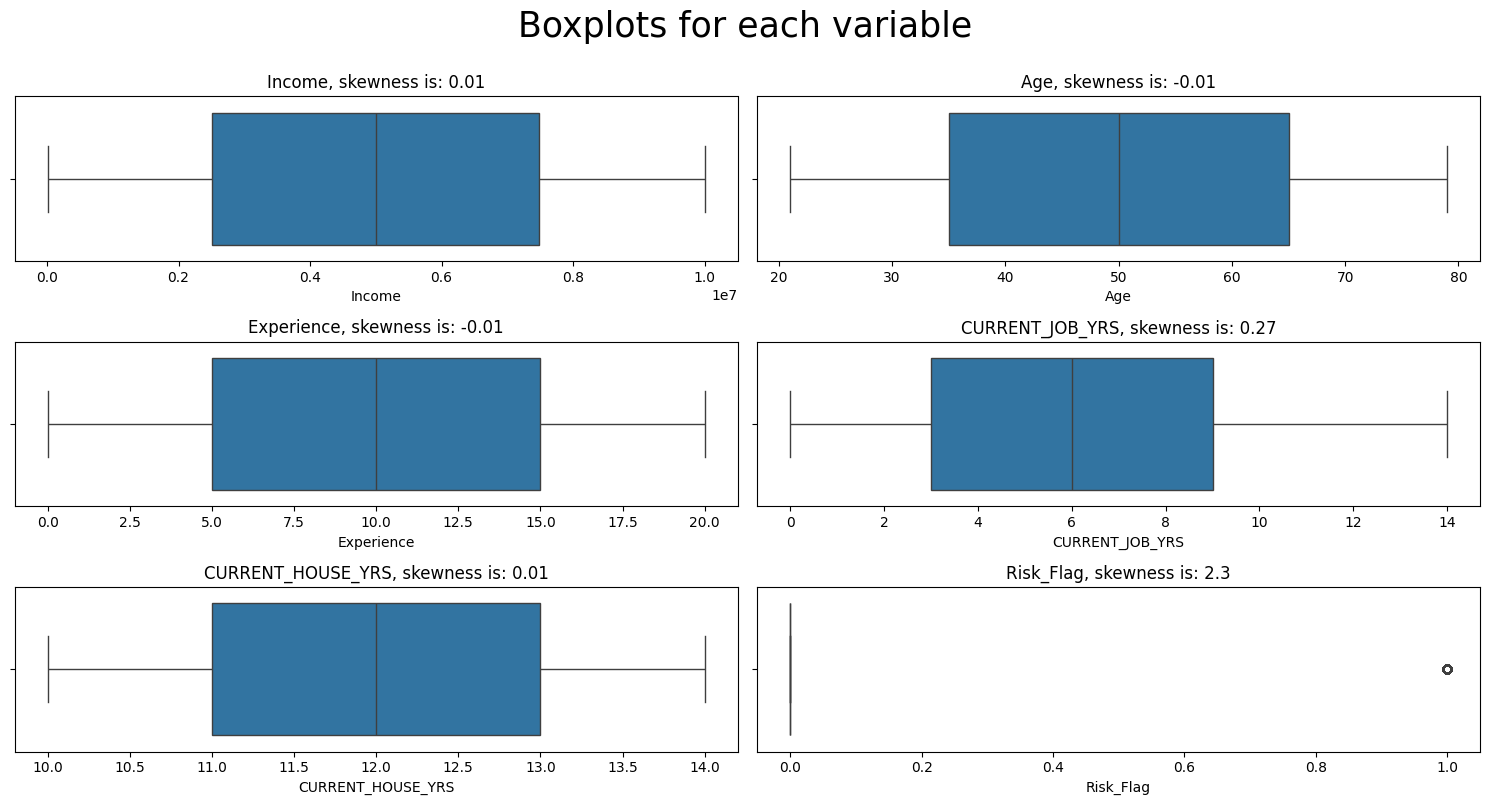

In [ ]:
df_num = df[nums]

def boxplots_custom(df_num):
    num_plots = len(df_num.columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    fig.suptitle('Boxplots for each variable', y=1, size=25)

    for i, column in enumerate(df_num.columns, start=1):
        row = (i - 1) // num_cols
        col = (i - 1) % num_cols
        sns.boxplot(x=df_num[column], ax=axs[row, col])
        axs[row, col].set_title(column + ', skewness is: ' + str(round(df_num[column].skew(), 2)))

    plt.tight_layout()
    plt.show()

boxplots_custom(df_num)

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    low_limit = Q1 - 1.5 * IQR
    high_limit = Q3 + 1.5 * IQR

    # Menandai outlier
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

# Hasil
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 252000
Jumlah baris setelah memfilter outlier: 252000


### 1.3 Business Insight

Berikut Merupakan beberapa business insight dari hasil EDA diatas:
1. Profil Pendapatan Peminjam
*   Rata-rata pendapatan peminjam adalah sekitar 5 Juta Rupee per bulan, dengan rentang dari 10 Juta Rupee hinggan hampir 1 miliar per tahun.
*   Peminjam dengan pendapatan lebih tinggi cenderung mampu untuk membayar pinjaman
2.   Usia dan Pengalaman Kerja
*   Usia rata-rata adalah 50 tahun, dengan pengalaman kerja rata-rata 10 tahun.
*   Usia dan pengalaman kerja yang lebih tinggi menunjukkan stabilitas keuangan, meskipun usia lanjut bisa juga menambah risiko jika pembayaran dilakukan dalam jangka panjang.
3. Kepemilikan Aset
*   Sebagian besar peminjam tidak memiliki rumah sendiri (menyewa) dan tidak memiliki kendaraan pribadi.
*   Peminjam tanpa aset fisik seperti rumah atau mobil dianggap memiliki risiko lebih tinggi karena tidak memiliki jaminan jika terjadi gagal bayar.
4. Status Pernikahan
*   Mayoritas peminjam berstatus single. Ini berarti sebagian besar dari mereka tidak memiliki tanggungan keluarga, yang bisa mempengaruhi kemampuan mereka dalam mengelola keuangan.
5. Risiko Kredit
*   Sekitar 12,3% calon peminjam dalam kategori risiko tinggi, yang berpotensi mengalami kesulitan dalam melunasi pinjaman.
*   Identifikasi calon peminjam ini sangat penting untuk meminimalkan risiko gagal bayar.

### 1.4 Business Recommendation

1. Gunakan Teknologi Prediksi untuk Penilaian Risiko
*   Buat model machine learning untuk menilai risiko calon peminjam berdasarkan faktor-faktor seperti pendapatan, usia, kepemilikan aset, status pernikahan dan lokasi.
*   Model ini dapat membantu perusahaan menyaring calon peminjam dan menghindari pemberian kredit kepada mereka yang berisiko tinggi.
2. Segmentasi Calon Peminjam
*   Kelompok Risiko Rendah: berikan penawaran bungan rendah untuk menarik lebih banyak peminjam yang stabil.
*   Kelompok Risiko Tinggi: Terapkan syarat tambahan, seperti meminta agunan.
3. Strategi Berdasarkan Lokasi
*   Analisis lebih mendalam terhadap kota atau wilayah dengan konsentrasi risiko tinggi untuk memahami pola geografis riisko.
*   Fokuskan promosi di wilayah yang menunjukkan stabilitas keuangan lebih baik.
4. Monitoring Data dan Kualitas Informasi
*   Pastikan data calon peminjam lengkap dan akurat, terutama pada kolom seperti kepemilikan rumah, kendaraan, atau informasi pengalaman kerja dan pendapatan.
*   Dengan data yang lebih berkualitas, model prediksi akan memberikan hasil lebih akurat.
5. Berdasarkan heatmap ternyata kolom "Experience" dan "Current_Job_Yrs" mempunyai hubungan yang kuat, salah satu dari kolomnya harus di drop untuk menghindari multikolinearitas.









## 2. Stage 2

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### 2.1 Feature Engineering

#### 2.1.1 Encoding

In [ ]:
# Categorical data yang menggunakan Label Encoding
df['Married/Single_encode'] = df['Married/Single'].map({'married': 1, 'single': 0})
df['House_Ownership_encode'] = df['House_Ownership'].map({'norent_noown':0,'rented': 1, 'owned': 2})
df['Car_Ownership_encode'] = df['Car_Ownership'].map({'yes': 1, 'no': 0})

#### 2.1.2 New Features

In [ ]:
# Feature CMI (untuk handle Experience x CURRENT_JOB_YRS multicolinearity)
mm_scaler = MinMaxScaler()
df[['Experience_Norm', 'CURRENT_JOB_YRS_Norm']] = mm_scaler.fit_transform(df[['Experience', 'CURRENT_JOB_YRS']])

# Define weights
alpha = 0.8  # Weight for Experience
beta = 0.2   # Weight for CURRENT_JOB_YRS

# *New Feature - Career Maturity Index (CMI)*
df['CMI'] = alpha * df['Experience_Norm'] + beta * df['CURRENT_JOB_YRS_Norm']

In [ ]:
# Feature job_encoded (dari 'Profession')
job_groups = {
    'Engineering': ['Mechanical_engineer', 'Civil_engineer', 'Chemical_engineer', 'Design_Engineer',
                    'Computer_hardware_engineer', 'Petroleum_Engineer', 'Industrial_Engineer', 'Engineer'],
    'IT/Software': ['Software_Developer', 'Web_designer', 'Computer_operator', 'Technology_specialist'],
    'Creative': ['Graphic_Designer', 'Technical_writer', 'Fashion_Designer', 'Artist', 'Designer'],
    'Healthcare': ['Physician', 'Dentist', 'Surgeon', 'Psychologist', 'Biomedical_Engineer'],
    'Management': ['Hotel_Manager', 'Consultant', 'Architect', 'Official', 'Chef', 'Analyst'],
    'Legal/Government': ['Politician', 'Magistrate', 'Lawyer', 'Civil_servant', 'Police_officer', 'Firefighter', 'Army_officer'],
    'Financial': ['Financial_Analyst', 'Chartered_Accountant', 'Economist'],
    'Science/Research': ['Scientist', 'Geologist', 'Microbiologist', 'Statistician', 'Technician'],
    'Aviation': ['Flight_attendant', 'Air_traffic_controller', 'Aviator'],
    'Miscellaneous': ['Librarian', 'Secretary', 'Drafter', 'Comedian', 'Surveyor']
}

# Map job positions to groups
df['job_groups'] = df['Profession'].map({job: group for group, jobs in job_groups.items() for job in jobs})


# K-Fold Target Encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df['job_encoded'] = 0

for train_idx, val_idx in kf.split(df):
    # Create views of the training and validation data
    X_train_fold, X_val_fold = df.iloc[train_idx], df.iloc[val_idx]
    # Calculate mean Risk_Flag for each job group in training data
    job_mean = X_train_fold.groupby('job_groups')['Risk_Flag'].mean()

    # Apply encoding to validation set using the view
    df.loc[val_idx, 'job_encoded'] = X_val_fold['job_groups'].map(job_mean)

# Fill NaN values (for unseen categories) with global mean
df['job_encoded'].fillna(df['Risk_Flag'].mean(), inplace=True)
df['job_encoded'] = mm_scaler.fit_transform(df[['job_encoded']])

In [ ]:
# Feature community_type (dari 'CITY' dan 'STATE' informasi dari https://en.wikipedia.org/wiki/Classification_of_Indian_cities)
tier_1_cities = [
    "Ahmedabad", "Bangalore", "Chennai", "Delhi",
    "Hyderabad", "Kolkata", "Mumbai", "Pune"
]

tier_2_cities = [
    "Agra", "Amritsar", "Aurangabad", "Bhopal", "Coimbatore",
    "Indore", "Jaipur", "Kanpur", "Lucknow", "Nagpur",
    "Patna", "Surat", "Vadodara", "Visakhapatnam"
]

# Assign Community Type
def assign_community(city):
    if city in tier_1_cities:
        return 'tier 1 city'
    elif city in tier_2_cities:
        return 'tier 2 city'
    else:
        return 'others'

df['community_type'] = df['CITY'].apply(assign_community)
df['community_type_encode'] = df['community_type'].map({'tier 1 city': 2, 'tier 2 city': 1, 'others': 0})

In [ ]:
# Dictionary to store scalers
scalers = {}

# List of features to scale
features_to_scale = ['Income', 'Age', 'CURRENT_HOUSE_YRS', 'community_type_encode', 'House_Ownership_encode']

# Apply MinMaxScaler to each feature separately
for feature in features_to_scale:
    scaler = MinMaxScaler()
    df[feature + "_Norm"] = scaler.fit_transform(df[[feature]])  # Transform and create new column

### 2.2 Modeling

#### 2.2.1 Training Data for Model Selection

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval test): '+ str(score['test_score'].mean()))
    print('recall (crossval train): '+ str(score['train_score'].mean()))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

##### 2.2.1.1 Logistic Regression

In [ ]:
X = df.drop(columns=['Id', 'Income', 'Profession', 'Experience', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'community_type',
                     'Age', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS', 'community_type_encode',
                    'Risk_Flag', 'Experience_Norm', 'CURRENT_JOB_YRS_Norm', 'job_groups','House_Ownership_encode'])
y = df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced", random_state=42)
logreg.fit(X_train, y_train)
eval_classification(logreg)

[[34070 32259]
 [ 4169  5102]]
Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.52
Precision (Test Set): 0.14
Recall (Test Set): 0.55
F1-Score (Test Set): 0.22
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.54
recall (crossval test): 0.5295209893375102
recall (crossval train): 0.54984519238953


##### 2.2.1.2 Random Forest

In [ ]:
X = df.drop(columns=['Id', 'Income', 'Profession', 'CMI', 'CITY', 'STATE', 'community_type',
                     'Age', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS', 'community_type_encode',
                    'Risk_Flag', 'Experience_Norm', 'CURRENT_JOB_YRS_Norm', 'job_groups','House_Ownership_encode'])
y = df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

[[61337  4992]
 [ 2943  6328]]
Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.93
Precision (Test Set): 0.56
Recall (Test Set): 0.68
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.97
recall (crossval test): 0.7019510066660075
recall (crossval train): 0.9863853610530281


##### 2.2.1.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

[[58914  7415]
 [ 2304  6967]]
Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.93
Precision (Test Set): 0.48
Recall (Test Set): 0.75
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.98
recall (crossval test): 0.8014418766814627
recall (crossval train): 0.9997015725750847


##### 2.2.1.4 Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etree = ExtraTreesClassifier(class_weight="balanced", random_state=42)
etree.fit(X_train, y_train)
eval_classification(etree)

[[60889  5440]
 [ 2612  6659]]
Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.93
Precision (Test Set): 0.55
Recall (Test Set): 0.72
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.98
recall (crossval test): 0.7431505549802517
recall (crossval train): 0.9997015725750847


##### 2.2.1.5 XGboost

In [ ]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
negative_class = sum(y_train == 0)
positive_class = sum(y_train == 1)
scale_pos_weight = negative_class / positive_class

# Train XGBoost with scale_pos_weight
xgboost = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgboost.fit(X_train, y_train)

eval_classification(xgboost)

[[55229 11100]
 [ 1754  7517]]
Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.85
Precision (Test Set): 0.40
Recall (Test Set): 0.81
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.92
recall (crossval test): 0.7926699467656074
recall (crossval train): 0.8644751988827128


##### 2.2.1.6 LightGBM

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(class_weight="balanced")
lgbm.fit(X_train, y_train)
eval_classification(lgbm)

[LightGBM] [Info] Number of positive: 21725, number of negative: 154675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 176400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[[50274 16055]
 [ 2414  6857]]
Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.77
Precision (Test Set): 0.30
Recall (Test Set): 0.74
F1-Score (Test Set): 0.43
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.85
[LightGBM] [Info] Number of positive: 24797, number of negative: 176803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013256 seconds.
You can set `force_row_wise=true` to remove the o

##### 2.2.1.7 CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

X = df.drop(columns=[
    'Id', 'CMI', 'Risk_Flag', 'Married/Single_encode', 'community_type', 'job_groups',
    'House_Ownership_encode', 'Car_Ownership_encode', 'Experience_Norm', 'CURRENT_JOB_YRS_Norm', 'job_encoded',
    'community_type_encode', 'Income_Norm', 'Age_Norm', 'CURRENT_HOUSE_YRS_Norm', 'community_type_encode_Norm',
    'House_Ownership_encode_Norm'
])
y = df['Risk_Flag']

# Train Test Split for CatBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
df[cat_features] = df[cat_features].astype(str)

In [ ]:
catboost = CatBoostClassifier(
    verbose=0,
    auto_class_weights="Balanced",
    loss_function="Logloss",
    random_seed=42,
    cat_features = cat_features
)

catboost.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
eval_classification(catboost)

[[53692 12637]
 [  484  8787]]
Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.86
Precision (Test Set): 0.41
Recall (Test Set): 0.95
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.95
recall (crossval test): 0.9762242245107171
recall (crossval train): 0.9765536013699183


#### 2.2.2 Tune Best Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Define model with GPU
catboost = CatBoostClassifier(
    verbose=0,
    auto_class_weights="Balanced",
    loss_function="Logloss",
    random_seed=42,
    cat_features = cat_features,
    task_type="GPU",  # Force GPU usage
    devices="0",  # Specify GPU
    thread_count=1
)

# Define hyperparameter grid
param_grid = {
    "iterations": [1000, 1500],
    "learning_rate": [0.02, 0.05, 0.1],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [3, 5, 10],
    "bagging_temperature": [0.2, 0.5, 0.8],
    "border_count": [32, 64],
}

# Define scoring metric
scoring_metric = make_scorer(recall_score, greater_is_better=True)

# GridSearch with limited parallelism for GPU
grid_search = GridSearchCV(
    catboost,
    param_grid,
    scoring=scoring_metric,
    cv=3,  # Reduce CPU usage
    n_jobs=1,  # Ensure GPU is used
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.02; total time=  13.8s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.02; total time=  13.6s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.02; total time=  13.8s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.05; total time=  13.9s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.05; total time=  14.0s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.05; total time=  13.8s
[CV] END bagging_temperature=0.2, border_count=32, depth=4, iterations=1000, l2_leaf_reg=3, learning_rate=0.1; total time=  14.3s
[CV] END bagging_temp

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ba5a3ca8b50>,
             n_jobs=1,
             param_grid={'bagging_temperature': [0.2, 0.5, 0.8],
                         'border_count': [32, 64], 'depth': [4, 6, 8],
                         'iterations': [1000, 1500], 'l2_leaf_reg': [3, 5, 10],
                         'learning_rate': [0.02, 0.05, 0.1]},
             scoring=make_scorer(recall_score), verbose=2)

In [ ]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bagging_temperature': 0.2, 'border_count': 32, 'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 10, 'learning_rate': 0.02}


#### 2.2.3 Final Model Training on Full Training Data

In [ ]:
# Concatenate the datasets
X_final_train = np.concatenate([X_train, X_test], axis=0)
y_final_train = np.concatenate([y_train, y_test], axis=0)

# Convert back to Pandas DataFrame
X_final_train = pd.DataFrame(X_final_train, columns=X_train.columns)  # Preserve column names
y_final_train = pd.DataFrame(y_final_train, columns=["Target"])  # Assign column name

print(f"Ukuran data final untuk training: {X_final_train.shape}")

Ukuran data final untuk training: (252000, 11)


In [ ]:
# Initialize CatBoostClassifier correctly
final_model = CatBoostClassifier(
    verbose=0,
    auto_class_weights="Balanced",
    loss_function="Logloss",
    random_seed=42,
    cat_features = cat_features,
    iterations=1500,
    learning_rate=0.02,
    depth=6,
    l2_leaf_reg=10,
    bagging_temperature=0.2,
    border_count=32
)


# Train the model
final_model.fit(X_final_train, y_final_train)
eval_classification(final_model)

print("✅ Final Model telah dilatih dengan seluruh data training!")

[[54574 11755]
 [  281  8990]]
Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.84
Precision (Test Set): 0.43
Recall (Test Set): 0.97
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.95
roc_auc (train-proba): 0.95
recall (crossval test): 0.9697084597411653
recall (crossval train): 0.9687703796706983
✅ Final Model telah dilatih dengan seluruh data training!


In [ ]:
import pickle

# Save the model
with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("✅ Model saved as final_model.pkl")

✅ Model saved as final_model.pkl


### 2.2.4 Feature Importance

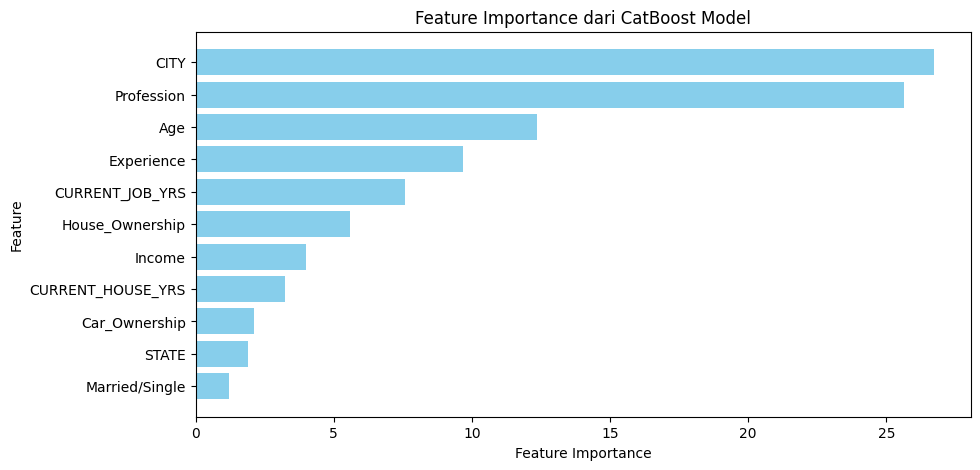

In [ ]:
# Get feature importance
feature_importance = final_model.feature_importances_

# Create a DataFrame with feature importance values
feature_df = pd.DataFrame({'Feature': X_final_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_df["Feature"], feature_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance dari CatBoost Model")
plt.gca().invert_yaxis()
plt.show()

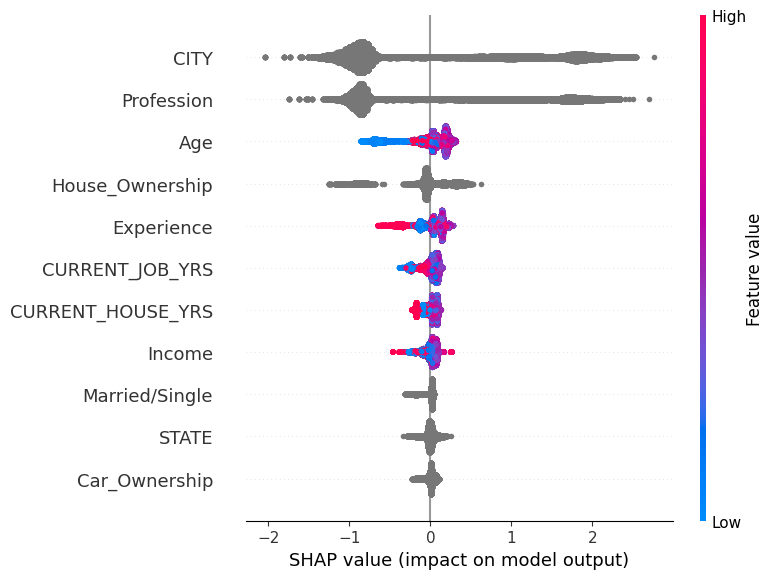

In [ ]:
import shap

explainer = shap.TreeExplainer(final_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Stage 3

### 3.1 Error Analysis

In [ ]:
df_test = pd.DataFrame(X_test, columns=X.columns)
y_pred_test = final_model.predict(X_test)

df_test['y_true'] = y_test
df_test['y_pred'] = y_pred_test

df_test['error_type'] = np.select(
    [
        (df_test['y_true'] == 1) & (df_test['y_pred'] == 1),  # True Positive (TP)
        (df_test['y_true'] == 0) & (df_test['y_pred'] == 0),  # True Negative (TN)
        (df_test['y_true'] == 0) & (df_test['y_pred'] == 1),  # False Positive (FP)
        (df_test['y_true'] == 1) & (df_test['y_pred'] == 0)   # False Negative (FN)
    ],
    ['TP', 'TN', 'FP', 'FN'],
    default='Unknown'
)

In [ ]:
df_test.sample(10)

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,CMI,y_true,y_pred,error_type
250628,8793005,53,single,rented,no,Technical_writer,Siwan,Bihar,11,0.811429,0,1,FP
180254,6913078,38,married,rented,no,Aviator,Sirsa,Haryana,14,0.602857,1,1,TP
133522,9500698,27,single,rented,no,Computer_hardware_engineer,Ramagundam,Telangana,14,0.434286,0,0,TN
84643,3846302,66,single,rented,yes,Petroleum_Engineer,Bhatpara,West_Bengal,11,0.645714,0,0,TN
221181,5018480,71,single,norent_noown,no,Biomedical_Engineer,Jodhpur,Rajasthan,10,0.474286,0,1,FP
83303,3713726,56,single,rented,no,Dentist,Baranagar,West_Bengal,14,0.740000,0,0,TN
7969,452661,51,married,rented,no,Computer_hardware_engineer,Farrukhabad,Uttar_Pradesh,10,0.880000,0,0,TN
247593,7270728,74,single,owned,no,Librarian,Dibrugarh,Assam,12,0.877143,0,1,FP
82869,7853718,24,single,rented,no,Librarian,Bahraich,Uttar_Pradesh,11,0.420000,0,0,TN
172711,7566849,24,single,rented,yes,Flight_attendant,Kota,Rajasthan,11,0.837143,0,0,TN


#### 3.1.1 EDA FP dan FN

In [ ]:
df_error = df_test[df_test['error_type'].isin(['FP', 'FN'])]
df_error.head()

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,CMI,y_true,y_pred,error_type
239302,4716686,74,single,norent_noown,no,Analyst,Firozabad,Uttar_Pradesh,10,0.568571,0,1,FP
235588,8631544,69,married,rented,no,Graphic_Designer,Solapur,Maharashtra,12,0.705714,0,1,FP
235462,3359719,49,single,rented,no,Fashion_Designer,Korba,Chhattisgarh,14,0.705714,0,1,FP
249828,493379,66,single,rented,yes,Hotel_Manager,Kamarhati,West_Bengal,11,0.325714,0,1,FP
190640,7571977,75,single,rented,yes,Civil_servant,Ranchi,Jharkhand,13,0.271429,0,1,FP


In [ ]:
df_error.describe()

,Income,Age,CURRENT_HOUSE_YRS,CMI,y_true,y_pred
count,1.183800e+04,11838.000000,11838.000000,11838.000000,11838.000000,11838.000000
mean,4.994805e+06,50.411725,12.002957,0.493935,0.024075,0.975925
std,2.879988e+06,16.629968,1.403326,0.271713,0.153289,0.153289
min,1.067500e+04,21.000000,10.000000,0.000000,0.000000,0.000000
25%,2.478064e+06,36.000000,11.000000,0.271429,0.000000,1.000000
50%,5.000063e+06,50.000000,12.000000,0.500000,0.000000,1.000000
75%,7.515439e+06,65.000000,13.000000,0.722857,0.000000,1.000000
max,9.996192e+06,79.000000,14.000000,1.000000,1.000000,1.000000


In [ ]:
df_error['error_type'].value_counts()

,count
error_type,
FP,11553
FN,285


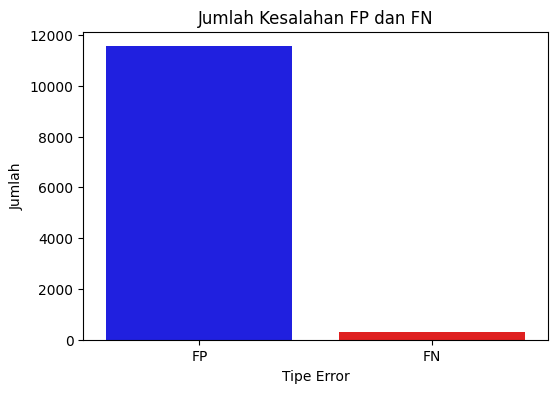

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_error, x='error_type', palette=['blue', 'red'])
plt.title("Jumlah Kesalahan FP dan FN")
plt.xlabel("Tipe Error")
plt.ylabel("Jumlah")
plt.show()

False Positive (FP) memiliki jumlah yang sangat tinggi, dibandingkan dengan False Negative (FN) yang jauh lebih rendah. FP ini terjadi ketika sistem salah menganggap seseorang berisiko padahal sebenarnya tidak beresiki. Hal ini bisa berakibat pada penolakan credit yang seharusnya diterima. FN lebih sedikit, dimana hanya sedikit sistem yang menganggap seseorang aman, padahal sebenarnya berisiko.

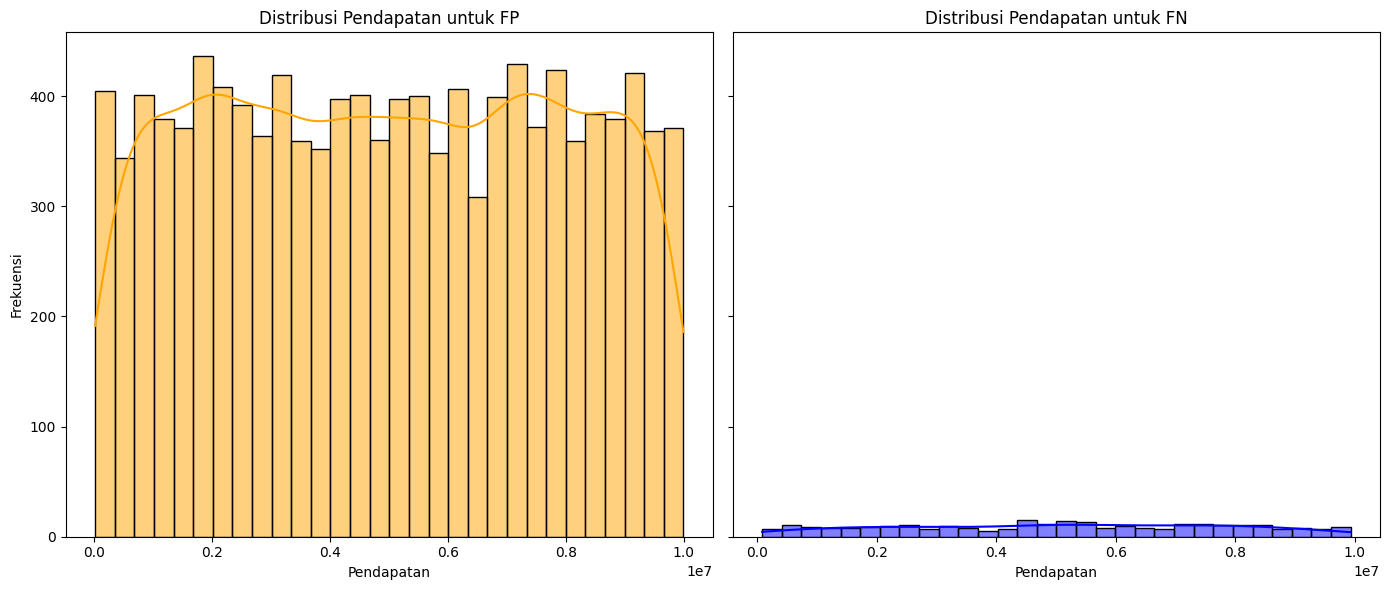

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# FP Plot
sns.histplot(data=df_error[df_error['error_type'] == 'FP'], x='Income', bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Distribusi Pendapatan untuk FP")
axes[0].set_xlabel("Pendapatan")
axes[0].set_ylabel("Frekuensi")

# FN Plot
sns.histplot(data=df_error[df_error['error_type'] == 'FN'], x='Income', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title("Distribusi Pendapatan untuk FN")
axes[1].set_xlabel("Pendapatan")

plt.tight_layout()
plt.show()

Dari income dapat dismipulkan bahwa FP lebih banyak yang mana banyak orang yang sebenarnya tidak bermasalah, tetapi sistem malah menganggap mereka sebagai resiko.

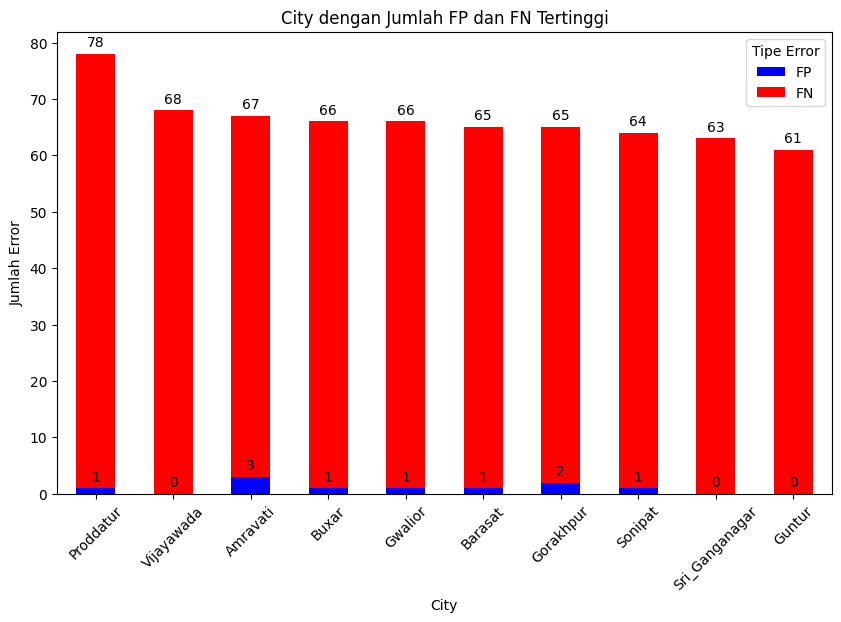

In [ ]:
city_counts = df_error.groupby(['CITY', 'error_type']).size().unstack(fill_value=0)

# Ambil hanya 10 kota dengan total error terbanyak
top_cities = city_counts.sum(axis=1).nlargest(10).index
city_counts_top = city_counts.loc[top_cities]

# Visualisasi dengan bar chart
fig, ax = plt.subplots(figsize=(10, 6))
city_counts_top.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title("City dengan Jumlah FP dan FN Tertinggi")
plt.xlabel("City")
plt.ylabel("Jumlah Error")
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.xticks(rotation=45)
plt.show()

Kota yang memiliki FN tertinggi Proddatur , Vijayawada, dan Buxar. Ini menunjukkan bahwa model lebih sering menerima credit yang sebenarnya tidak layak mendapatkan credit. FP tertinggi adalah kota Amravati. Ini berarti model lebih sering menolak credit, yang sebenarnya layak untuk medapatkan credit.

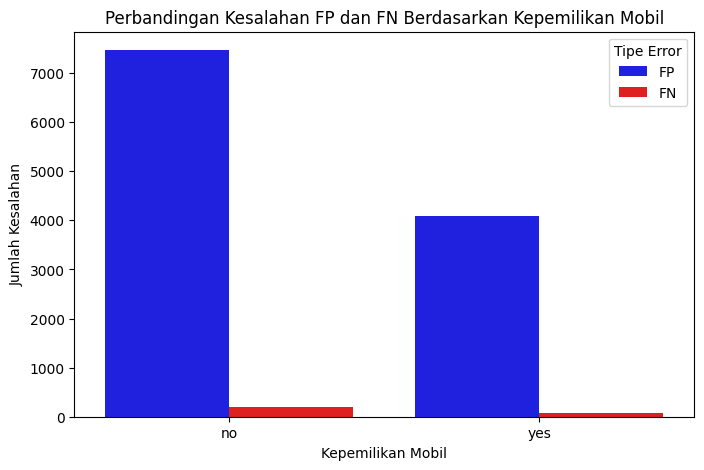

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_error, x='Car_Ownership', hue='error_type', palette=['blue', 'red'])
plt.title("Perbandingan Kesalahan FP dan FN Berdasarkan Kepemilikan Mobil")
plt.xlabel("Kepemilikan Mobil")
plt.ylabel("Jumlah Kesalahan")
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

Customer dengan status tidak memiliki mobil lebih sering ditolak, dibandingkan dengan customer yang memiliki mobil. Padahal banyak orang yang potensial tetapi ditolak karena tidak memiliki mobil.

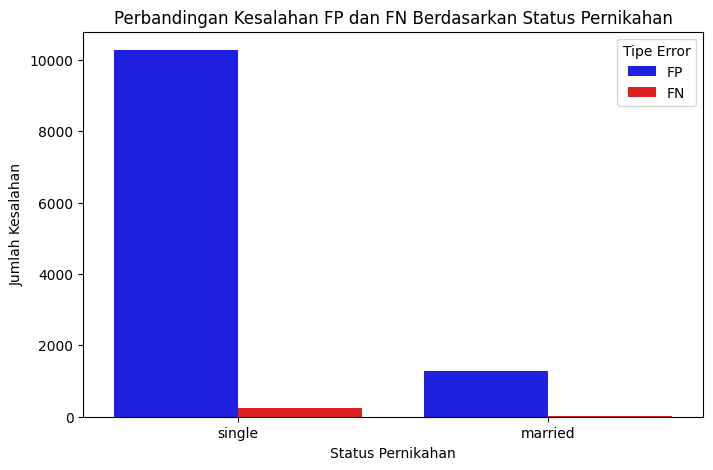

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_error, x='Married/Single', hue='error_type', palette=['blue', 'red'])
plt.title("Perbandingan Kesalahan FP dan FN Berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Kesalahan")
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

Dilihat dari hasil grafik, bahwa single memiliki resiko karena memiliki FN yang tinggi dibandingkan FP. Karena yang seharusnya dianggap tidak lolos, tetapi dianggap lolos. Single juga memiliki FP yang tinggi, dimana seharusnya dianggap lolos tetapi tidak lolos.

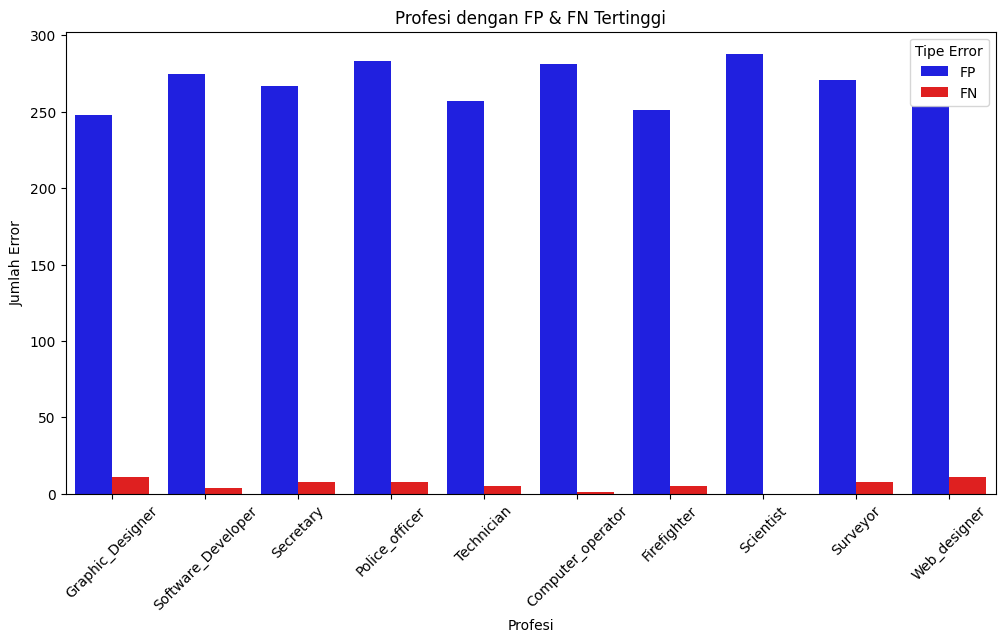

In [ ]:
top_professions = df_error['Profession'].value_counts().nlargest(10).index
df_prof = df_error[df_error['Profession'].isin(top_professions)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_prof, x='Profession', hue='error_type', palette=['blue', 'red'])
plt.title("Profesi dengan FP & FN Tertinggi")
plt.xlabel("Profesi")
plt.ylabel("Jumlah Error")
plt.xticks(rotation=45)
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

Banyak pekerjaan yang sering mengalami false positive (FP), salah ditolak. Seperti computer operator, Scientist, dan software developer artinya mereka sebenarnya layak mendapatkan credit, tetapi sistem malah menganggap mereka berisiko tinggi. False negative (FN) jumlahnya kecil ini berarti sistem cukup baik dalam mengenali orang yang memang berisiko tinggi.

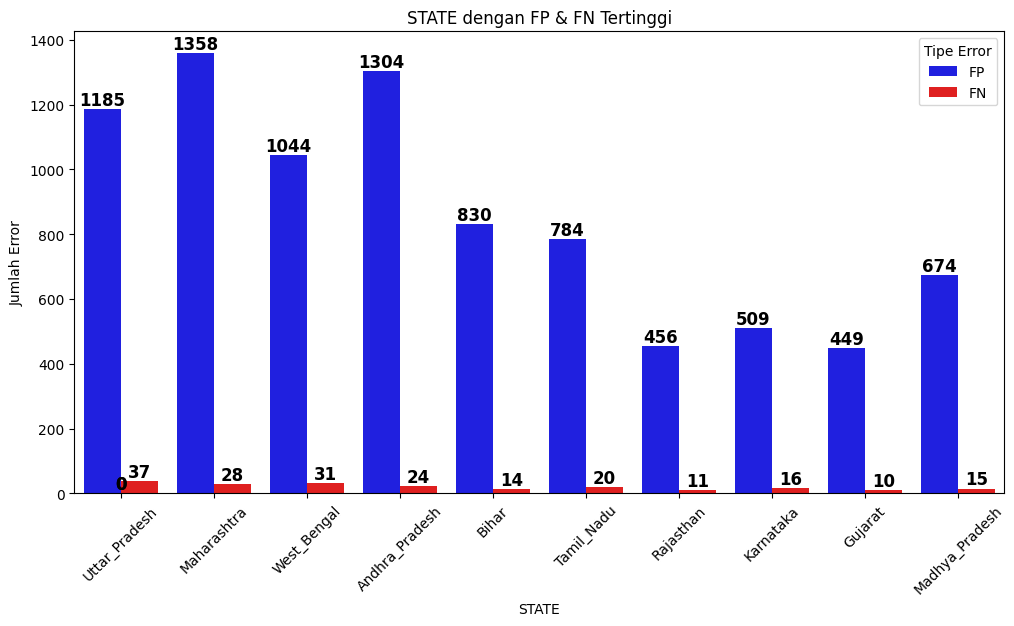

In [ ]:
top_states = df_error['STATE'].value_counts().nlargest(10).index
df_state = df_error[df_error['STATE'].isin(top_states)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_state, x='STATE', hue='error_type', palette=['blue', 'red'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("STATE dengan FP & FN Tertinggi")
plt.xlabel("STATE")
plt.ylabel("Jumlah Error")
plt.xticks(rotation=45)
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

Beberapa state menunjukkan penolakan yang tinggi Maharashtra, Andhra Pradesh, dan Uttar Pradesh memiliki jumlah FP yang tinggi. Hal ini menunjukan bahwa orang yang sebenarnya layak mendapatkan credit, tetapi malah ditolak oleh model. Kesalahan bisa menyebabkan potensi kehilangan pelanggan potensial.

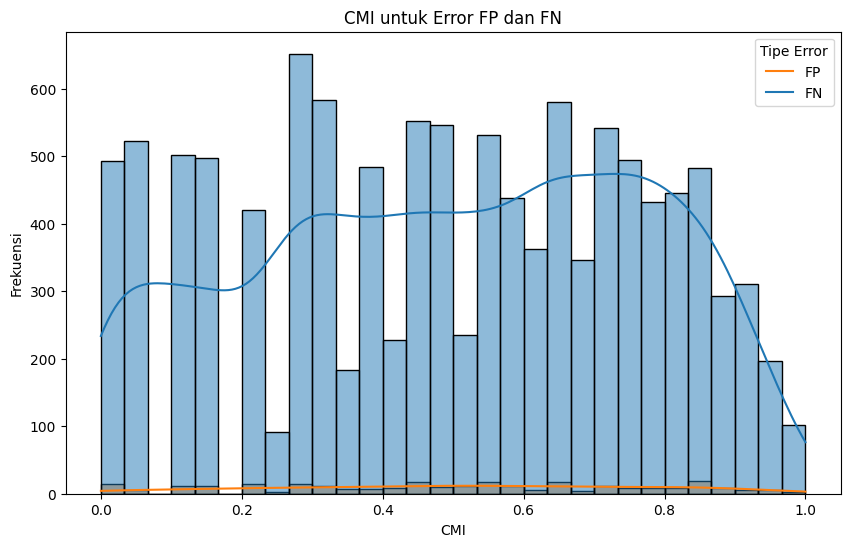

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_error, x='CMI', hue='error_type', kde=True, bins=30)
plt.title("CMI untuk Error FP dan FN")
plt.xlabel("CMI")
plt.ylabel("Frekuensi")
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

False Positive (FP) merata di seluruh rentang CMI, namun dengan jumlah yang kecil. Namun False Negative (FN) dominan pada nilai CMI menengah hingga tinggi (0.4 - 0.9). Jika dilihat dari lebih banyak FN yang ada, maka CMI memiliki resiki yang tinggi karena yang seharusnya ditolak tetapi lolos untuk melakukan credit.

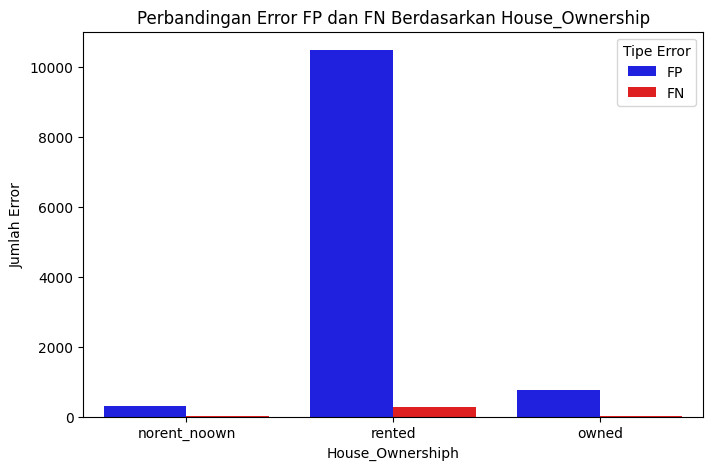

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_error, x='House_Ownership', hue='error_type', palette=['blue', 'red'])
plt.title("Perbandingan Error FP dan FN Berdasarkan House_Ownership")
plt.xlabel("House_Ownershiph")
plt.ylabel("Jumlah Error")
plt.legend(title="Tipe Error", labels=["FP", "FN"])
plt.show()

Hasil menunjukan bahwa False Positive (FP) dan False Negative (FN) paling banyak terjadi pada kategori rented. Kategori owned  dan norent_noown mempunyai jumlah error yang jauh lebih rendah dibandingkan kategori rented. Dengan demikian rented memiliki jumlah error tertinggi, karena rented lebih sering dianggap tidak lolos padahal seharusnya lolos. Hal ini bisa menandakan bahwa ada resiko yang terjadi yang membuat mereka lebih sering salah diklasifikasikan.

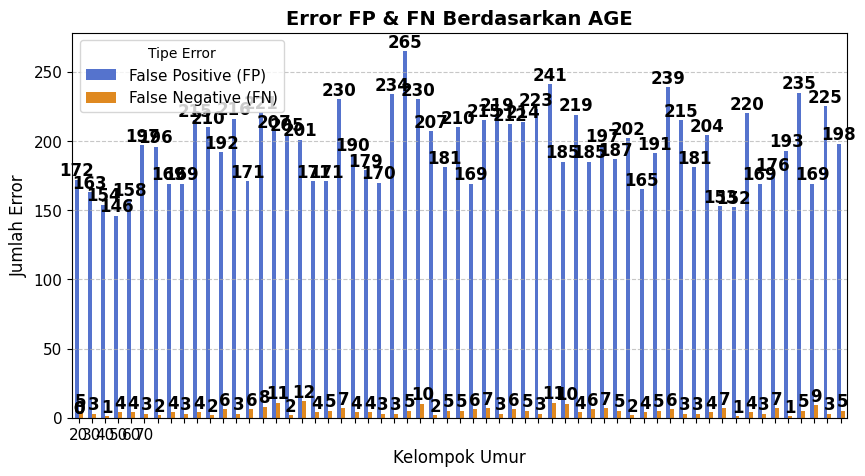

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_error, x='Age', hue='error_type',
                   palette=['royalblue', 'darkorange'], width=0.6)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

new_labels = ['20', '30', '40', '50', '60', '70']
ax.set_xticklabels(new_labels)

# Judul & Label
plt.title("Error FP & FN Berdasarkan AGE", fontsize=14, fontweight='bold')
plt.xlabel("Kelompok Umur", fontsize=12)
plt.ylabel("Jumlah Error", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Tipe Error", labels=["False Positive (FP)", "False Negative (FN)"], fontsize=11)
plt.show()

Model cenderung berhati-hati untuk rentang usia 40-50 tahun. Kesalahan FP paling tinggi dikelompok ini, dengan begitu banyak orang di usia 40-50 yang seharusnya dianggap bisa lolos, tetapi malah dianggap sebagai hal yang beresiko. FN paling banyak terjadi pada kelompok 50 tahun, dengan demikian banyak orang seharunya dianggap resiko tetapi lolos.

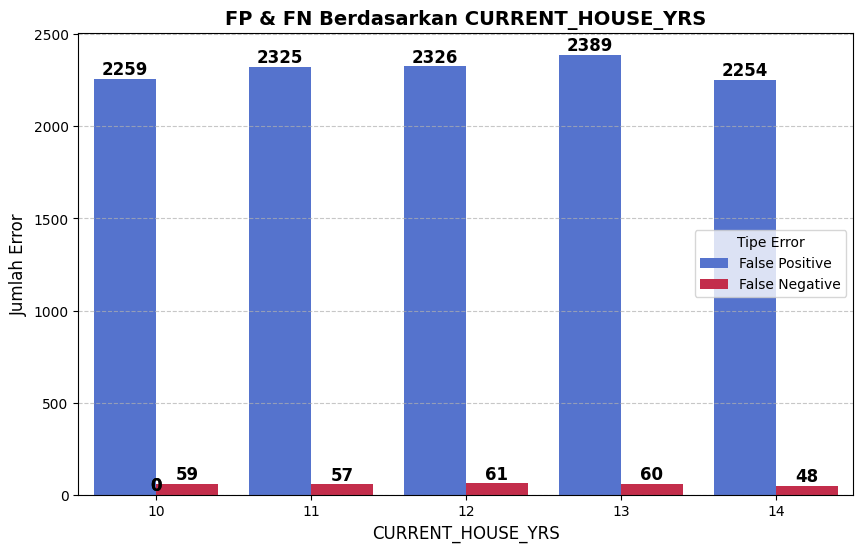

In [ ]:
# Buat figure
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_error, x='CURRENT_HOUSE_YRS', hue='error_type', palette=['royalblue', 'crimson'])

# Tambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Perbaiki tampilan
plt.title("FP & FN Berdasarkan CURRENT_HOUSE_YRS", fontsize=14, fontweight='bold')
plt.xlabel("CURRENT_HOUSE_YRS", fontsize=12)
plt.ylabel("Jumlah Error", fontsize=12)
plt.legend(title="Tipe Error", labels=["False Positive", "False Negative"])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal untuk memudahkan pembacaan

plt.show()

Error Fp lebih dominan dibandingkan FN, Fp tertinggi terjadi pada Current house setelah 12 tahun sedangkan FN tertinggi terjadi pada Current house 11 tahun. Dengan demikian menunjukan bahwa model cenderung lebih sering salah dalam mendefinisikan kasus sebagai positif (FP). False Positive dominan di semua kategori, dengan begitu menunjukkan bahwa model cenderung ketat dalam menilai risiko, dimana hal yang seharusnya dianggap lolos malah dianggap tidak lolos. False Negative lebih rendah tetapi tetap ada, yang mana bisa berpotensi merugikan perusahaan. Diperlukan analisa lebih lanjut untuk dapat memastikan bahwa lama tinggal seseorang, tidak dianggap sebagai sebuah resiko.

#### 3.1.2 Interpretasi

Kesimpulan :
1. False Positive (FP) memiliki jumlah yang sangat tinggi, dibandingkan dengan
False Negative (FN) yang jauh lebih rendah. FP ini terjadi ketika sistem salah mendeteksi bahwa seseorang yang dianggap berisiko padahal sebenarnya tidak beresiki. Hal ini bisa berakibat pada penolakan credit yang seharusnya diterima. FN lebih sedikit, dimana hanya sedikit sistem yang menganggap seseorang aman, padahal sebenarnya berisiko. Hal ini bisa membuat kerugian jika memiliki FN yang lebih tinggi. Dari beberapa featur yang memiliki.
2. Feature yang memiliki FP adalah Income, Car owwnership, Married/Single, Profession, Current house, Age, House ownershop dan State. Feature ini memiliki Fp yang tinggi dimana credit lebih sering ditolak, padahal feature ini memiliki potensi yang baik.
3. Feature CMI dan City memiliki error FN yang lebih mendominasi. Dimana yang seharusnya credit ditolak, tetapi credit diterima. Hal ini bisa sangat merugikan. Dan perlu mendapatkan perhatianlebih.
4. Beberapa state seperti Maharashtra, Andhra Pradesh, dan Uttar Pradesh memiliki jumlah FP yang tinggi. Hal ini menunjukan bahwa kota-kota terebut memiliki potensi yaang baik. Sedangkan Kota Proddatur , Vijayawada, dan Buxar. Ini menunjukkan bahwa model lebih sering menerima credit yang sebenarnya tidak layak mendapatkan credit.
5. Orang yang memiliki mobil lebih mudah untuk mendapatkan credit dibandingkan,orang yang tidak memilki mobil. Dan untuk kepemilikan rumah dengan status rented lebih sering ditolak creditnya, padahal status tersebut memiliki potensi.Tetapi kepemilikan rumah selama 11 tahun memiliki resiko, karena yang seharusnya ditolak tetapi diterima creditnya.
6. Model cenderung berhati-hati untuk rentang usia 40-50 tahun. Kesalahan FP paling tinggi dikelompok ini, dengan begitu banyak orang di usia 40-50 yang seharusnya dianggap bisa lolos, tetapi malah dianggap sebagai hal yang beresiko. FN paling banyak terjadi pada kelompok 50 tahun, dengan demikian banyak orang seharunya dianggap resiko tetapi lolos.
7. Banyak pekerjaan yang sering mengalami false positive (FP), salah ditolak. Seperti computer operator, Scientist, dan software developer artinya mereka sebenarnya layak mendapatkan credit, tetapi sistem malah menganggap mereka berisiko tinggi. False negative (FN) jumlahnya kecil ini berarti sistem cukup baik dalam mengenali orang yang memang berisiko tinggi.

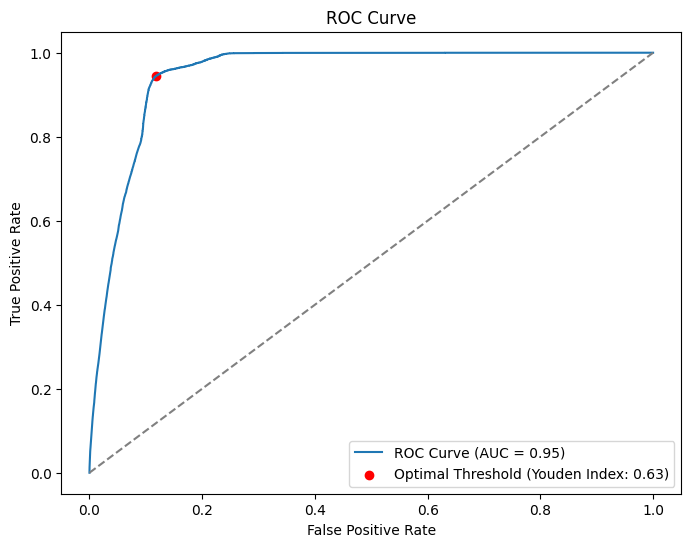

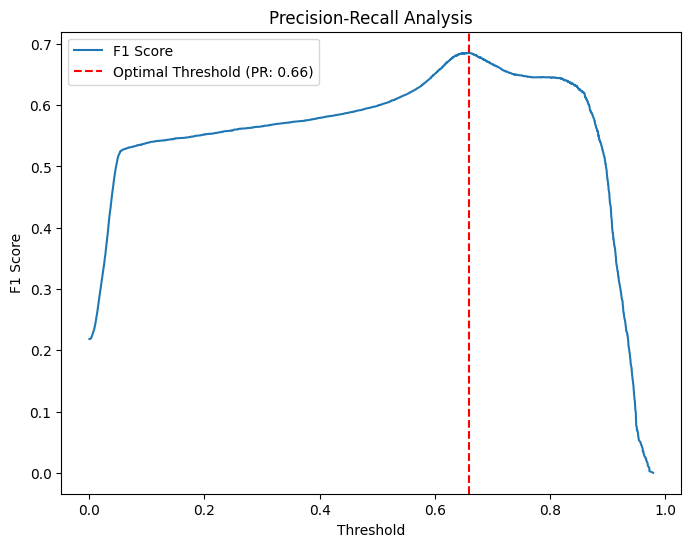

Optimal Threshold (Youden's Index): 0.63
Optimal Threshold (Precision-Recall): 0.66


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_probs = final_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Compute Youden's J Index
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold_roc = thresholds_roc[optimal_idx]

# Compute Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx_pr = np.argmax(f1_scores)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold (Youden Index: {optimal_threshold_roc:.2f})')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(thresholds_pr, f1_scores[:-1], label="F1 Score")
plt.axvline(optimal_threshold_pr, color='red', linestyle="--", label=f"Optimal Threshold (PR: {optimal_threshold_pr:.2f})")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Precision-Recall Analysis")
plt.legend()
plt.show()

print(f"Optimal Threshold (Youden's Index): {optimal_threshold_roc:.2f}")
print(f"Optimal Threshold (Precision-Recall): {optimal_threshold_pr:.2f}")
